# Домашняя работа 1
## Часть 1: Титаник

*Открыть в Pandas файл `titanic.csv`. Ответить на вопросы ниже, используя средства языка Python и необходимых библиотек*

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

In [32]:
titanic_data = pd.read_csv('titanic.csv')

titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Задание 1** 
*Какое количество мужчин и женщин ехало на корабле?*

In [33]:
male, female = titanic_data['Sex'].value_counts()
print(f'Количество мужчин: {male}')
print(f'Количество женщин: {female}')

Количество мужчин: 577
Количество женщин: 314


**Задание 2** 
*Какой части пассажиров удалось выжить?*

In [45]:
survival_rate = titanic_data['Survived'].mean()
print(f'Часть пассажиров, которой удалось выжить: {survival_rate:.3f}')

Часть пассажиров, которой удалось выжить: 0.384


**Задание 3**
*Какую долю пассажиры первого класса составляли среди всех пассажиров? Постройте круговую диаграмму по всем классам пассажиров*

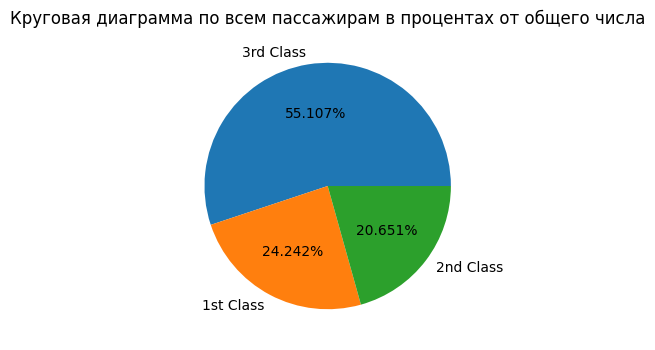

Доля первого класса на корабле: 0.242


In [46]:
class_distribution = titanic_data['Pclass'].value_counts(normalize=True)

plt.figure(figsize=(5, 4))
class_distribution.plot.pie(autopct='%1.3f%%', labels=['3rd Class', '1st Class', '2nd Class'])
plt.title('Круговая диаграмма по всем пассажирам в процентах от общего числа')
plt.ylabel('')
plt.show()
print(f'Доля первого класса на корабле: {class_distribution[1]:.3f}')

**Задание 4** 
*Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. В чем статистическая разница между показателями медианы и среднего? Выведите любой перцентиль возраста пассажиров. Что показывает перцентиль в статистике?*

**Решение**
1. *Среднее значение* является арифметическим средним всех значений в наборе данных и может быть искажено экстремально высокими или низкими значениями (выбросами).
2. *Медиана --* это среднее значение, которое делит набор данных пополам: половина значений выше медианы, а половина ниже. Медиана устойчива к выбросам, поскольку зависит только от порядка значений, а не от их абсолютных величин.
3. *Перцентиль --* это мера, используемая в статистике для определения относительного положения элемента в выборке. 75-й перцентиль показывает, что 75% пассажиров на корабле были в возрасте до 38 лет, а 25% пассажиров были старше 38 лет.

In [47]:
mean_age = titanic_data['Age'].mean()
median_age = titanic_data['Age'].median()

print(f'Средний возраст: {mean_age:.3f}')
print(f'Медианный возраст: {median_age}')

percentile_75 = titanic_data['Age'].quantile(0.75)
print(f'75-й перцентиль возраста: {percentile_75}')
print(f'Статистическая разница между медианой и средним: {median_age - mean_age:.3f}')

Средний возраст: 29.699
Медианный возраст: 28.0
75-й перцентиль возраста: 38.0
Статистическая разница между медианой и средним: -1.699


**Задание 5**
*Коррелируют ли число братьев/сестер/супругов с числом родителей/детей?
Посчитайте корреляцию Пирсона между признаками SibSp и Parch.
Что показывает корреляция?*

1. *Коэффициент корреляции Пирсона* измеряет степень линейной зависимости между двумя переменными. Значение коэффициента может варьироваться от -1 до 1:
$Корреляция = 1$ означает полную прямую линейную зависимость.
$Корреляция = −1$ означает полную обратную линейную зависимость.
$Корреляция = 0$ означает отсутствие линейной зависимости.
2. В нашем случае корреляция $0.415$ показывает на умеренную положительную линейную связь между числом братьев/сестер/супругов и числом родителей/детей.

In [48]:
correlation = titanic_data[['SibSp', 'Parch']].corr().iloc[0, 1]
print(f'Корреляция: {correlation.round(3)}')

Корреляция: 0.415


**Задание 6**
*Какое самое популярное женское имя на корабле?*

In [52]:
def extract_first_name(full_name: str) -> str:
    """
    Данная функция извлекает и возвращает имя из полного ФИО пассажира.
    
    В ней учитываются особенности записи имен, такие как наличие титулов (Mr., Mrs. и др.)
    и указание девичьей фамилии в скобках.
    
    Примеры:
        extract_first_name("Futrelle, Mrs. Jacques Heath (Lily May Peel)") -> "Lily"
        extract_first_name("Heikkinen, Miss. Laina") -> "Laina"

    :param full_name: Полное имя пассажира в формате "Фамилия, Титул. Имя (Девичья фамилия)".
    :return: Имя девушки.
    """

    if "(" in full_name:
        name_inside_brackets = full_name.split("(")[1]
        return name_inside_brackets.split()[0]

    name_part = full_name.split(",")[1].strip()
    
    name_without_title = name_part.split(".")[1].strip()

    return name_without_title.split(" ")[0]


# берём только женщин
female_passengers = titanic_data[titanic_data['Sex'] == 'female']

# извлекаем фамилии с помощью функции `extract_first_name`
female_first_names = female_passengers['Name'].apply(extract_first_name)

# находим самое популярное женское имя
most_popular_female_name = female_first_names.value_counts().idxmax()
most_popular_female_name_count = female_first_names.value_counts().max()

print(f'Самое популярное женское имя: {most_popular_female_name},'
      f' оно встречается {most_popular_female_name_count} раз.')

Самое популярное женское имя: Anna, оно встречается 14 раз.


## Часть 2: Аппроксимация


Дана сложная математическая функция:
$$f(x) = \sin(\frac{x}{5}) \cdot \exp(\frac{x}{10}) + 5 \cdot \exp(\frac{-x}{2}), \quad x \in [1, 15]$$

Необходимо найти такую функцию $g(x)$, что $f(x) \approx g(x)$, но при этом $g(x)$ имеет более простую форму. Очевидно, что можно выбрать многочлен в качестве функционала $g$. Итак, пусть $g(x)$ является многочленом $n$ степени $(n > 0)$.

Иначе говоря, задача состоит в поиске функции вида:
$f(x) \approx g(x) = a_0 + a_1 \cdot x + \dots + a_n \cdot x^n$
Так как любой полином однозначно определяется по любым $n + 1$ различным точкам, через которые он проходит, то для нахождения набора коэффициентов $a_{in}$ необходимо решить следующую СЛАУ:

\begin{cases}
a_0 + a_1x_0 + a_2x_0^2 + \dots + a_nx_0^n = f(x_0) \\
a_0 + a_1x_1 + a_2x_1^2 + \dots + a_nx_1^n = f(x_1) \\
\vdots \\
a_0 + a_1x_n + a_2x_n^2 + \dots + a_nx_n^n = f(x_n)
\end{cases}


**Задание 1**

*Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией $f$ в точках $1$ и $15$. Решите данную систему с помощью функции `scipy.linalg.solve`. Нарисуйте функцию $f$ и полученный многочлен. Хорошо ли он приближает
исходную функцию?*


In [54]:
def function(x: np.array) -> np.array:
    """
    Вычисляет значения функции f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) для переданного массива x.
     
    :param x: Массив значений, для которых необходимо вычислить функцию
    :return: Массив значений функции f(x)
    """
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)


def plot_comparison(x_list: np.array,
                    y_list: np.array,
                    y_approximated: np.array = None,
                    title: str = "",
                    label_original: str = "f(x)",
                    label_approximated: str = "Многочлен",
                    only_original: bool = False):
    """
    Функция для визуализации графиков функции f(x) и её аппроксимаций.
    
    :param x_list: Массив значений x для построения графика
    :param y_list: Массив значений функции f(x)
    :param y_approximated: Массив значений аппроксимированной функции (необязательный параметр)
    :param title: Заголовок графика
    :param label_original: Метка для легенды функции f(x)
    :param label_approximated: Метка для легенды аппроксимированной функции
    :param only_original: Если True, будет показан только график функции f(x)
    :return: 
    """
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_list, y_list, label=label_original, color="blue")
    
    if not only_original and y_approximated is not None:
        plt.plot(x_list, y_approximated, label=label_approximated, color="red", linestyle="--")
        
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

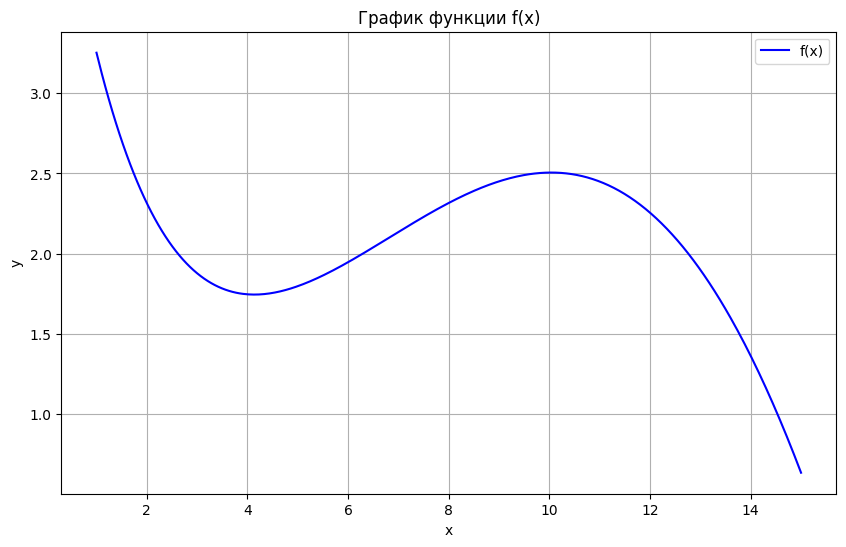

In [55]:
x = np.linspace(1, 15, 400)
y = function(x)
plot_comparison(x, y, title="График функции f(x)", only_original=True)

In [56]:
from typing import Tuple

def matrix_vector_coefficients(points: np.array) -> Tuple[np.array, np.array, np.array]:
    """
    Формирует систему линейных уравнений для аппроксимации функции многочленом.
    
    По заданным точкам `points` формируется система линейных уравнений, которая
    соответствует условиям прохождения многочлена через заданные точки. 
    Таким образом, мы получаем матрицу коэффициентов, вектор свободных членов и
    решаем эту систему для нахождения коэффициентов аппроксимирующего многочлена.
    
    :param points: Массив точек, через которые должен проходить многочлен
    :return: Три массива: матрицу коэффициентов, вектор свободных членов и коэффициенты многочлена
    """
    matrix = np.vstack([points ** i for i in range(len(points))]).T
    vector = function(points)
    coefficients = linalg.solve(matrix, vector)

    return matrix, vector, coefficients


def polynomial(x, coefficients):
    """
    Вычисляет значения многочлена для заданного x с помощью коэффициентов.
    
    Функция возвращает многочлен, который может быть любой степени
    в зависимости от количества предоставленных коэффициентов.
    
    :param x: Значение или массив значений x, для которых нужно вычислить многочлен
    :param coefficients: Массив коэффициентов многочлена
    :return: Значение многочлена для данного x или массив значений многочлена
    """
    powers_of_x = np.array([x ** i for i in range(len(coefficients))]).T
    if np.isscalar(x):
        powers_of_x = powers_of_x.reshape(1, -1)

    return np.sum(coefficients * powers_of_x, axis=1)


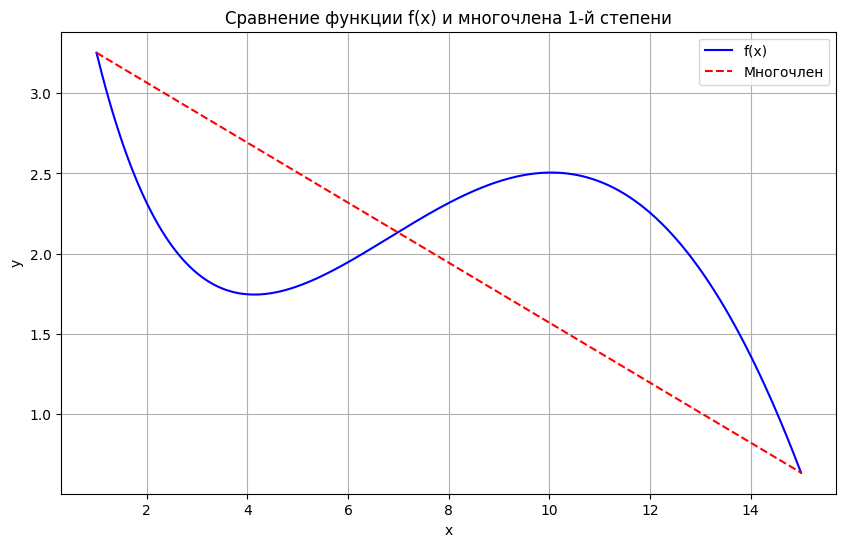

In [57]:
points_1 = np.array([1, 15])
A_1, b_1, coefficients_1 = matrix_vector_coefficients(points_1)

plot_comparison(x, y, polynomial(x, coefficients_1), "Сравнение функции f(x) и многочлена 1-й степени")

*Из графика видно, что многочлен первой степени совершенно не приближает функцию $f(x)$*

**Задание 2**
*Повторите те же шаги для многочлена второй степени, который совпадает с функцией $f(x)$ в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?*

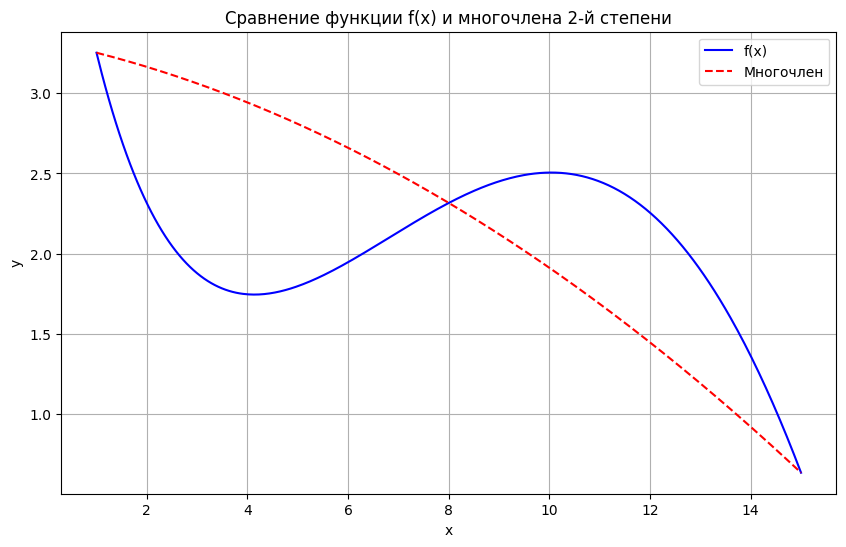

In [58]:
points_2 = np.array([1, 8, 15])

A_2, b_2, coefficients_2 = matrix_vector_coefficients(points_2)

plot_comparison(x, y,
                polynomial(x, coefficients_2), "Сравнение функции f(x) и многочлена 2-й степени")


*Из графика многочлена второй степени также видно, что он не приближает функцию $f(x)$.*

**Задание 3**

*Повторите те же шаги для многочлена третьей степени, который совпадает с функцией $f(x)$ в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа:
$w_0, w_1, w_2, w_3$) являются ответом на задачу.*

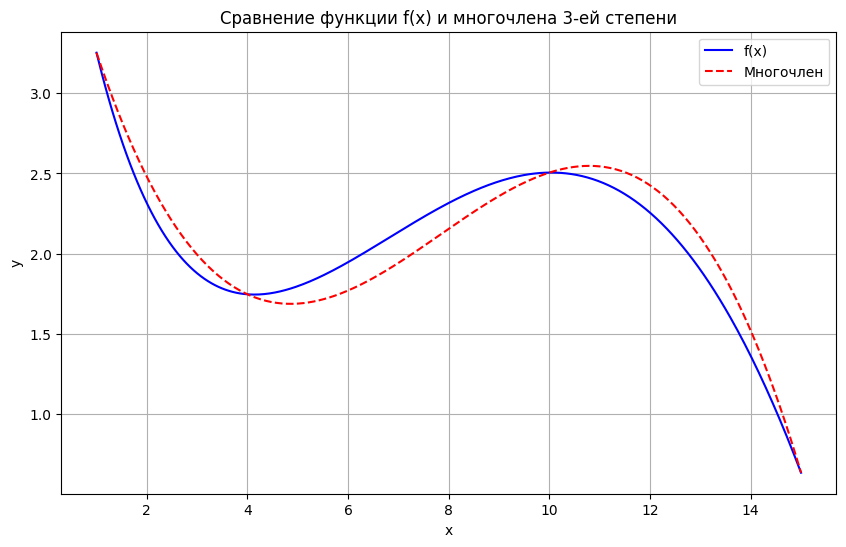

Коэффициенты многочлена третьей степени: 4.363; -1.296; 0.193; -0.008 округлённые до трёх знаков после запятой


In [59]:
points_3 = np.array([1, 4, 10, 15])

A_3, b_3, coefficients_3 = matrix_vector_coefficients(points_3)

plot_comparison(x, y,
                polynomial(x, coefficients_3), "Сравнение функции f(x) и многочлена 3-ей степени")

w_0, w_1, w_2, w_3 = coefficients_3

print(f'Коэффициенты многочлена третьей степени: '
      f'{w_0:.3f}; {w_1:.3f}; {w_2:.3f}; {w_3:.3f} округлённые до трёх знаков после запятой')

*Из графика многочлена третьей степени видно, что он очень аппроксимирует исходную функцию $f(x)$*

**Задание 4**

1. Приведите примеры задач, для которых необходима аппроксимация.
2. Какие метрики существуют для определения эффективности аппроксимации? Приведите пример.

**Ответ**

1. *Задачи, где используется аппроксимация:*
    1. *Интерполяция данных*: Предсказание значений функции в точках, которые не входят в исходный набор данных.
    2. *Сглаживание данных*: Устранение выбросов в данных, сохраняя основной тренд.
    3. *Сокращение данных*: Представление большого набора данных с помощью упрощённой модели.
    4. *Замена сложных функций*: Использование простых функций для приближенного описания сложных.

2. *Метрики для аппроксимации:*
    1. *MSE (Среднеквадратичная ошибка)*: Среднее квадратов разностей между исходными и аппроксимированными значениями. $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $, где $y_i$ — исходные значения, $\hat{y}_i$ — аппроксимированные значения, $n$ — количество точек.
    2. *MAE (Средняя абсолютная ошибка)*: Среднее абсолютное значение разностей между исходными и аппроксимированными значениями. $ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $ 
   где $y_i$ — исходные значения, $\hat{y}_i$ — аппроксимированные значения, $n$ — количество точек.
    3. *Коэффициент детерминации $R^2$*: Измеряет долю дисперсии зависимой переменной, объясняемую моделью аппроксимации.

3. **Пример:**  
*У нас есть данные о продажах товара в течение года, и видно, что продажи изменяются в зависимости от времени года. Можно аппроксимировать эти данные полиномом определенной степени, чтобы прогнозировать продажи в будущем. После аппроксимации, MSE и MAE могут быть использованы для оценки точности этой аппроксимации.*

   